In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")
print("Path to dataset files:", path)

100%|██████████| 1.99M/1.99M [00:00<00:00, 82.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jp797498e/twitter-entity-sentiment-analysis/versions/2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [4]:
import os

# List files in the downloaded directory to find the CSV file
file_names = os.listdir(path)
csv_file = None
for file_name in file_names:
    if file_name.endswith('.csv'):
        csv_file = file_name
        break

if csv_file:
    full_csv_path = os.path.join(path, csv_file)
    df = pd.read_csv(full_csv_path)
    print(df.head())
    print(df.info())
else:
    print("No CSV file found in the downloaded directory.")

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Po

In [6]:
df['clean_text'] = (
    df['im getting on borderlands and i will murder you all ,']
    .str.lower()  # lowercase
    .str.replace(r"http\S+|@\S+|#","", regex=True)  # remove URLs, mentions, hashtags
    .str.replace(r"[^a-z\s]", "", regex=True)  # remove special characters
)

In [8]:
df['polarity'] = df['clean_text'].fillna('').apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(
    lambda p: 'Positive' if p > 0 else ('Negative' if p < 0 else 'Neutral')
)

# Check sentiment distribution
print(df['sentiment'].value_counts())

sentiment
Positive    33924
Negative    21216
Neutral     19541
Name: count, dtype: int64


/tmp/ipython-input-3189586066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


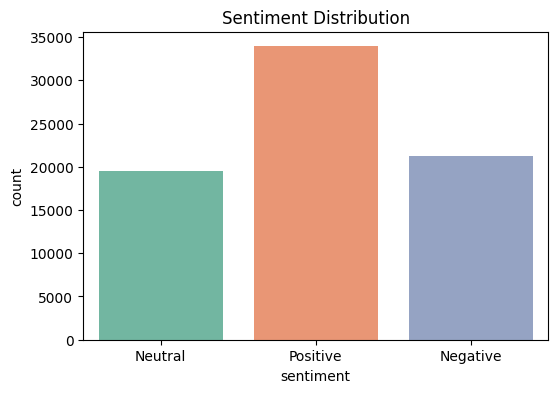

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.show()

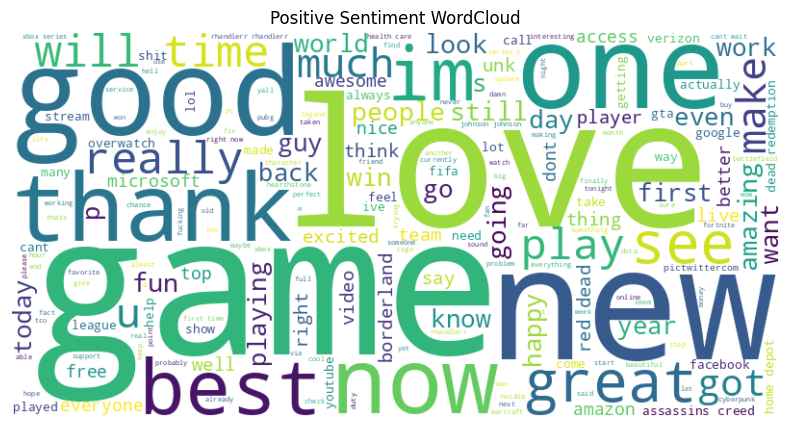

In [10]:
positive_text = " ".join(df[df['sentiment']=='Positive']['clean_text'])
wc_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment WordCloud')
plt.show()

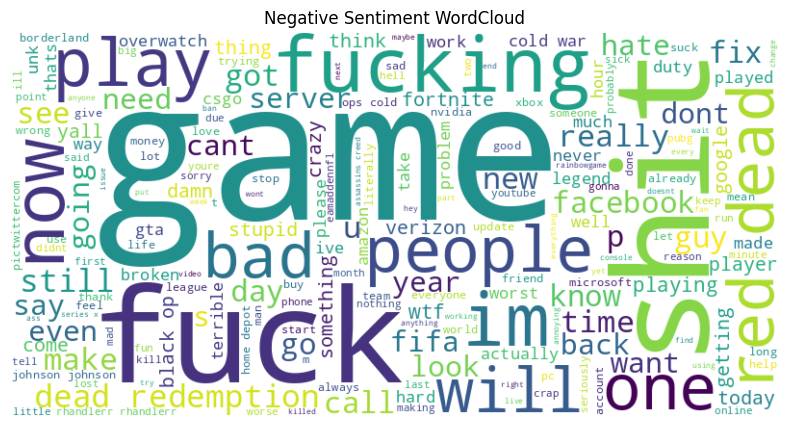

In [11]:
negative_text = " ".join(df[df['sentiment']=='Negative']['clean_text'])
wc_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment WordCloud')
plt.show()


In [14]:
#Sentiment Trend Over Time (if dataset has a 'date' column)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    daily_sentiment = df.groupby([df['date'].dt.date, 'sentiment']).size().unstack().fillna(0)
    daily_sentiment.plot(kind='line', figsize=(12,6), marker='o')
    plt.title('Daily Sentiment Trends')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.show()

df.to_csv('social_media_sentiment_results.csv', index=False)
print("Sentiment analysis completed and results saved.")

Sentiment analysis completed and results saved.
